In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np
from matplotlib import style
import seaborn as sns
import statistics

In [45]:
d1=pd.read_csv('X_test.csv')
d1.shape

(2672, 10)

In [46]:
d2=pd.read_csv('X_train.csv')
d2.shape

(4960, 10)

In [47]:
d3=d1.append(d2, ignore_index=True)

In [48]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7632 entries, 0 to 7631
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         7632 non-null   int64  
 1   brand         7632 non-null   object 
 2   model         7632 non-null   object 
 3   year          7632 non-null   int64  
 4   transmission  7632 non-null   object 
 5   mileage       7632 non-null   int64  
 6   fuelType      7632 non-null   object 
 7   tax           7632 non-null   float64
 8   mpg           7632 non-null   float64
 9   engineSize    7632 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 596.4+ KB


In [49]:
d3.drop_duplicates(keep=False,inplace=True)
d3

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0
...,...,...,...,...,...,...,...,...,...,...
7627,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1
7628,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0
7629,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0
7630,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0


In [50]:
#further we reshape out data 
df1=d3[(d3['year']>2015)]

In [51]:
df1

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
5,12019,vauxhall,Combo Life,2020,Semi-Auto,1950,Petrol,145.0,40.4,1.2
...,...,...,...,...,...,...,...,...,...,...
7624,13412,vw,Arteon,2019,Manual,7900,Diesel,145.0,52.3,2.0
7625,14104,toyota,Verso,2017,Semi-Auto,13913,Petrol,150.0,42.8,1.8
7626,19468,toyota,Prius,2019,Automatic,7194,Hybrid,135.0,64.2,1.8
7628,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0


In [92]:
df1['fuelType'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [52]:
#add new column which will show country of origin for a specific brand
Germany = ["merc", "vw", "audi",'bmw']
Swedish = ["skoda"]
British = ["vauxhall"]
USA=['ford']
Japan = ["toyota"]
South_Korea=['hyundi']
#using np.select
#here we will sort brand by appropriate country 
cond=[df1['brand'].isin(Germany),df1['brand'].isin(Swedish),df1['brand'].isin(USA), df1['brand'].isin(British),df1['brand'].isin(Japan),df1['brand'].isin(South_Korea)]
values=['Germany','Swedish','British','Japan','South_Korea','USA']
df1['Country']=np.select(cond,values)
print(df1)

      carID     brand        model  year transmission  mileage fuelType  \
0     12000      merc    GLS Class  2017    Automatic    12046   Diesel   
1     12001        vw       Amarok  2017    Automatic    37683   Diesel   
2     12004      merc    GLS Class  2019    Automatic    10000   Diesel   
3     12013     skoda        Scala  2019       Manual     3257   Petrol   
5     12019  vauxhall   Combo Life  2020    Semi-Auto     1950   Petrol   
...     ...       ...          ...   ...          ...      ...      ...   
7624  13412        vw       Arteon  2019       Manual     7900   Diesel   
7625  14104    toyota        Verso  2017    Semi-Auto    13913   Petrol   
7626  19468    toyota        Prius  2019    Automatic     7194   Hybrid   
7628  14416       bmw     6 Series  2017    Automatic    18000   Diesel   
7630  14666      audi           A7  2017    Semi-Auto    30150   Diesel   

        tax   mpg  engineSize      Country  
0     150.0  37.2         3.0      Germany  
1     260

<ipython-input-52-0c3e6b296920>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Country']=np.select(cond,values)


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

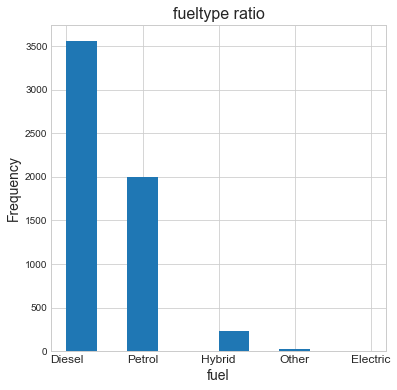

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
# plot histogram
ax.hist(df1['fuelType'])

# set title and labels
ax.set_title('fueltype ratio',fontsize=16)
ax.set_xlabel('fuel',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
plt.xticks(fontsize=12)

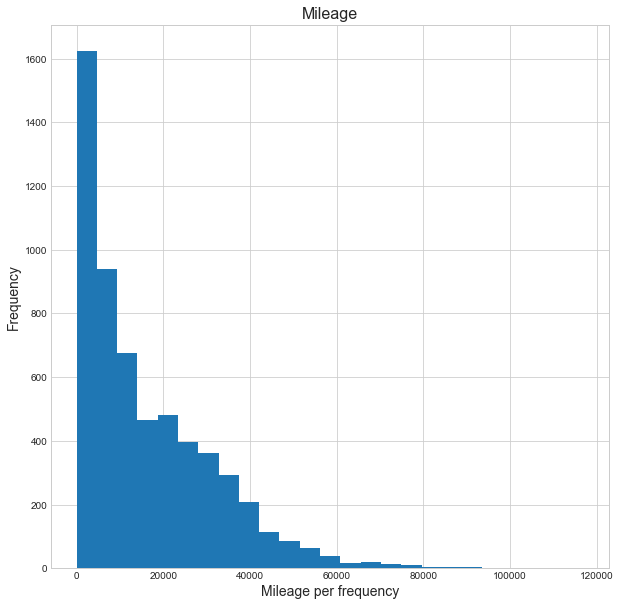

In [42]:
#here we should add new x variables like 0,10000,20000, 
fig, ax = plt.subplots(figsize=(10,10))
# plot histogram
ax.hist(df1['mileage'], bins = 25)
# set title and labels
ax.set_title('Mileage',fontsize=16)
ax.set_xlabel('Mileage per frequency',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
plt.show()


In [71]:
# Do the analysis for at least one set of two or more variables. Show appropriate plots for your data.
# Describe the result of your analysis.
#further we reshape out data 

f=df1[(df1['year']==2016)&(df1['Country']=='USA')]
f['mileage'].mean()

30030.16176470588

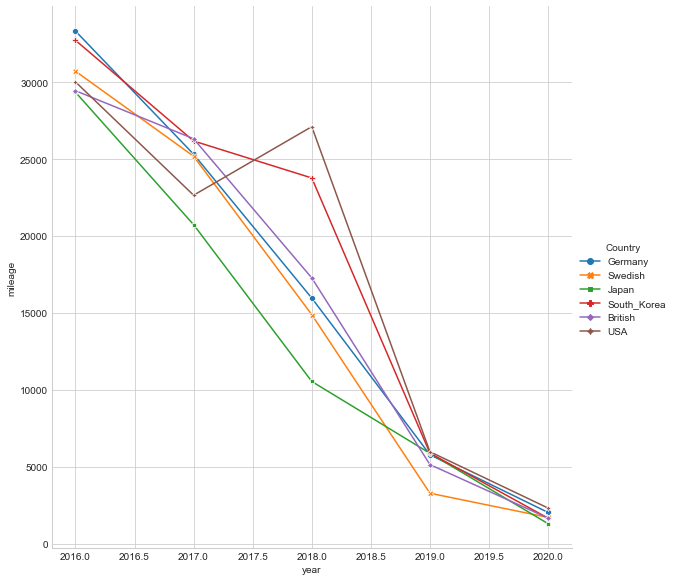

In [61]:
#mileage will plot average mileage for specific year and  for appropriate country
sns.relplot(x="year", y="mileage",data=df1, kind="line", ci=None, style="Country",hue="Country",height=8,markers=True, dashes=False);

In [88]:
# Pick the variable (column) with date/datetime values and show the appropriate plot for your data.
# Describe the result of your analysis.
c=df1[(df1['year']==2016)&(df1['brand']=='hyundi')]
f=c.value_counts()
f

carID  brand   model      year  transmission  mileage  fuelType  tax    mpg   engineSize  Country
12143  hyundi   I40       2016  Manual        38259    Diesel    30.0   65.7  1.7         USA        1
17740  hyundi   IX20      2016  Manual        36242    Petrol    125.0  50.4  1.4         USA        1
17127  hyundi   IX20      2016  Manual        21941    Petrol    125.0  50.4  1.4         USA        1
17232  hyundi   I40       2016  Manual        67654    Diesel    30.0   65.7  1.7         USA        1
17428  hyundi   Santa Fe  2016  Automatic     42812    Diesel    235.0  42.2  2.2         USA        1
                                                                                                    ..
14371  hyundi   IX20      2016  Manual        19999    Petrol    125.0  50.4  1.4         USA        1
14355  hyundi   IX20      2016  Manual        18146    Petrol    125.0  50.4  1.4         USA        1
14161  hyundi   IX20      2016  Manual        30565    Petrol    125.0  50.4  

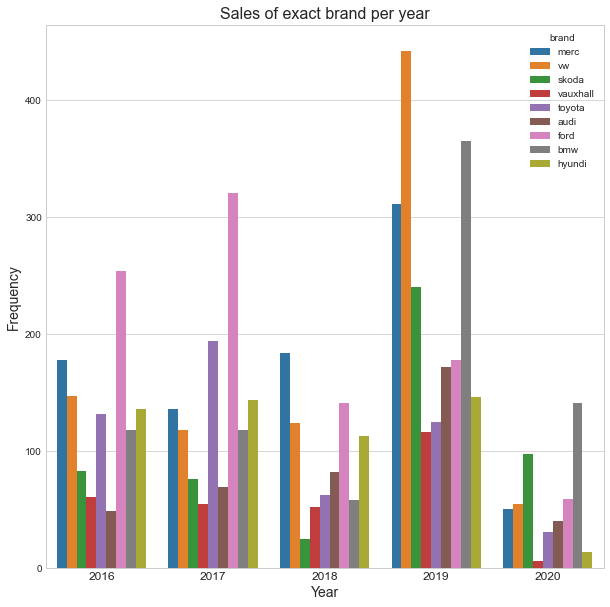

In [28]:
figure = plt.figure(figsize = (10,10));
ax = sns.countplot(x="year", data=df1,hue='brand')
ax.set_title('Sales of exact brand per year',fontsize=16)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.xticks(fontsize=12)
plt.show()

In [18]:
#return all cars that represent those brand that has more than 345 cars per brand'
f=df1.groupby('brand').filter(lambda x: x['mileage'].sum() > 20600)
f['brand'].value_counts()

ford        952
vw          886
merc        860
bmw         800
hyundi      553
toyota      545
skoda       522
audi        412
vauxhall    290
Name: brand, dtype: int64

In [34]:
#Implement any feature(s) of your own choice that is/are not mentioned in the specification.
# here i should user something new for example use groupby and then visualizatoin

Text(0.5, 1.0, 'Correlation between  engineSize and tax by brand')

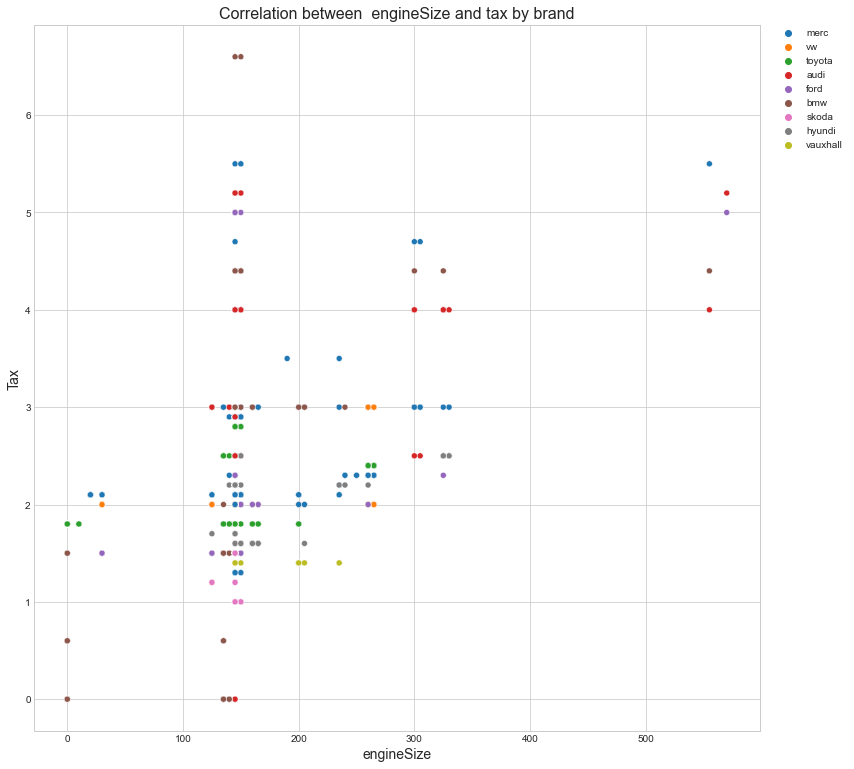

In [27]:
figure = plt.figure(figsize = (13,13));
df2 = df1.loc[df1['transmission'] == 'Automatic'] 
sns.scatterplot(data=df2, x='tax', y='engineSize', hue='brand')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('engineSize',fontsize=14)
plt.ylabel('Tax',fontsize=14)
plt.title('Correlation between  engineSize and tax by brand',fontsize=16)

Text(0.5, 1.0, 'how long will a full tank last for different brands')

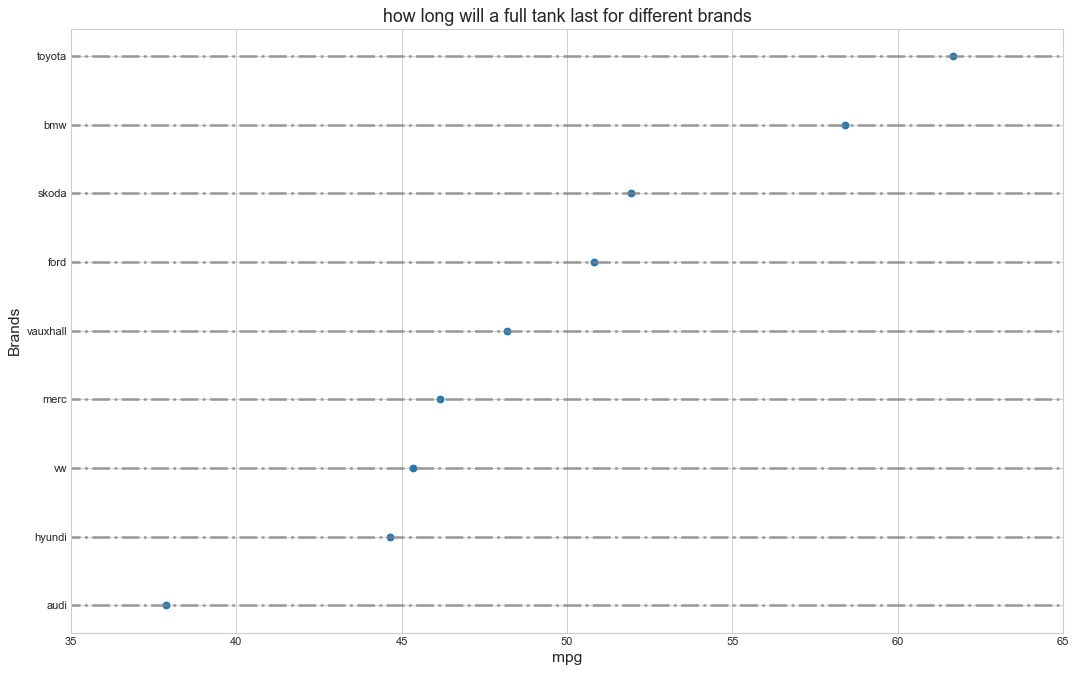

In [26]:
df4 = df1[['mpg', 'brand']].groupby('brand').apply(lambda x: x.mean())
df4.sort_values('mpg', inplace=True)
df4.reset_index(inplace=True)
df4
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df4.index, xmin=0, xmax=100, color='gray', alpha=0.7, linewidth=2.5, linestyles='dashdot')
ax.set_xlim(35, 65)
ax.scatter(y=df4.brand,x=df4.mpg)
plt.xlabel('mpg',fontsize=14)
plt.ylabel('Brands',fontsize=14)
plt.title('how long will a full tank last for different brands',fontsize=16)

In [89]:
df4 = df1[['mpg', 'brand']].groupby('brand').apply(lambda x: x.mean())
df4.sort_values('mpg', inplace=True)
df4.reset_index(inplace=True)
df4

,brand,mpg
0,audi,37.861650
1,hyundi,44.658228
2,vw,45.332506
3,merc,46.175233
4,vauxhall,48.182759
5,ford,50.819328
6,skoda,51.950958
7,bmw,58.414125
8,toyota,61.670642
